<a href="https://colab.research.google.com/github/angel-2022cal/angel-2022cal/blob/master/Amazon_Prime_w_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amazon Prime Video Dataset: 
There are about 4000+ rows and 16 columns, we are aimed to meature on how much a movie is consumed by the audiences per day. Higher number means the movies is more popular on our platform. 

This project is focus on following questions:
1. build a prediction model to predict whether a movie is going to perform well on our platform(cvt_per_day) based on the information in the dataset. 
2. how to deal with missing values.
3. how to selected, transformed, or engineered new features
4. the type of model used, and why 
5. any particular insights or other thoughts related on this dataset. 


**Part 0 Load packages, load data**

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sl
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving TVdata.txt to TVdata.txt


In [ ]:
TV = pd.read_table('TVdata.txt', header= 0, sep= ',', lineterminator='\n')
print(TV.head())

   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  import_id  release_year  \
0                            3  lionsgate          2013   
1                            3  lionsgate          2013   
2                            3      other          2012   
3                            4  lionsgate          2008   
4                            3  lionsgate          2013   

                                          genres  imdb_votes    budget  \
0                          Action,Thriller,Drama       69614  15000000   
1                          Comedy,Crime,Thriller       46705  15000000   
2                                    Crime,Drama      197596  260000

# *** Part 1: Data Exploration ***

### **1.1 Exclude erroneous data**

Each video should only appear once in the lits, duplicated video will be removed.


In [ ]:
if TV['video_id'].duplicated().sum()==0:
  print('no duplicated index')

no duplicated index


### **1.2 Understand numerical features**

### 1.2.1 Overview

In [ ]:
TV.info()
print(TV.drop(columns=['video_id', 'release_year'], axis=1).describe(percentiles = [0.1, 0.25,0.5, 0.75,0.95]))
(TV==0).sum(axis=0)/TV.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
import_id                       0.000
release_year                    0.000
genres                          0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
awards                          0.000
mpaa                            0.000
star_category                   0.437
dtype: float64

### 1.2.2 cvt_per_day feature

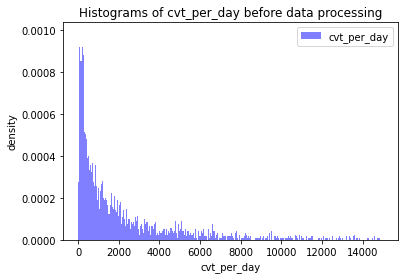

In [ ]:
plt.hist(TV['cvt_per_day'], bins= range(0,15000,30), color='blue', label='cvt_per_day', density=True,alpha = 0.5)
plt.title('Histograms of cvt_per_day before data processing')
plt.legend(loc='upper right')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

### 1.2.3 Correlation among numerical features

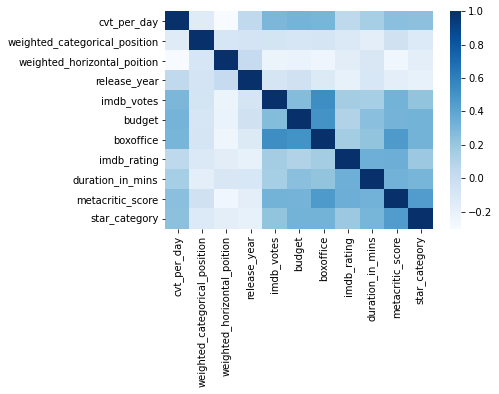

In [ ]:
corr = TV[['cvt_per_day', 'weighted_categorical_position','weighted_horizontal_poition',
           'release_year','imdb_votes','budget','boxoffice','imdb_rating',
           'duration_in_mins','metacritic_score','star_category']].corr()
sns.heatmap(corr, cmap='Blues')#YlGnBu

In [ ]:
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


### **1.3 Understand Categorical Features**

### 1.3.1 Distribution of standard categorical features 

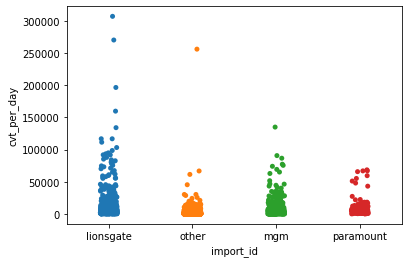

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


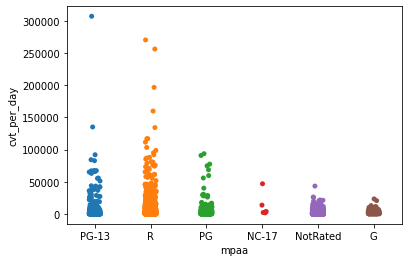

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


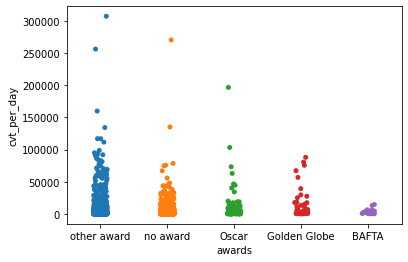

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [ ]:
sns.stripplot(x='import_id', y='cvt_per_day', data= TV)
plt.show()
print(TV['import_id'].value_counts())

sns.stripplot(x='mpaa', y='cvt_per_day', data=TV)
plt.show()
print(TV['mpaa'].value_counts())

sns.stripplot(x='awards', y='cvt_per_day', data=TV)
plt.show()
print(TV['awards'].value_counts())

After basic Data Exploratory Data Analysis, we will do some data cleaning and data preprocessing.

Firstly, we need to encode the categorical feature.
Secondly, we need to impute the mising value for both numeric and categorical feature.
Thirdly, we need to scale out feature, whihc can be better for our models' performance. 

1.3.2 Distribution of Splited genres

Some videos belongs to more than one genere, the genre of each video is splitted, this would help emphasize the effect of each individual genere. 

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


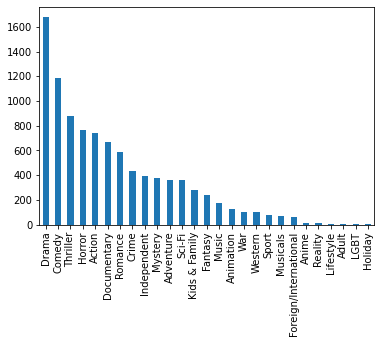

In [ ]:
gen_split= TV['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending = False).plot.bar()

### 1.3.3 Distribution of release_year

The release year of video varies through a wide range. Considering the popularity of a video usually dacays over time, the release_year should be bucketed based o n the release_year range.

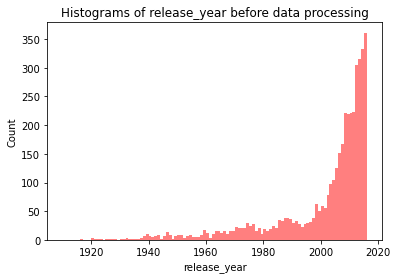

In [ ]:
plt.hist(TV['release_year'].values, bins=range(1910, 2017, 1), alpha=0.5, color='r')
plt.title('Histograms of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('Count')
plt.show()

## **Part 2: Feature Preprocessing**

### **2.1 Categorical features**

There are 5 categorical features: import_id, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators. 

The first 3 have relatively small sub-types, they can be easily converted to dummies. The 'genres' have 27 different sub-types, 6 of them are rarely observed. it is reasonable to group these 6 into 
1. Note, a video may have more than one genere, in the feature preprocessing, all genres are handled individually. 
2. The release_year is binned into 10 buckets based on the year range between 1917 and 2017. 


In [ ]:
#convert 3 categorical variables into dummy vairables
d_import_id = pd.get_dummies(TV['import_id']).astype(np.int64)
d_mpaa = pd.get_dummies(TV['mpaa']).astype(np.int64)
d_awards = pd.get_dummies(TV['awards']).astype(np.int64)

# convert 'generes'into dummy variables
d_genres = TV['genres'].str.get_dummies(sep=',').astype(np.int64)
d_genres['Misc_genres']= d_genres['Anime']| d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis =1)

In [ ]:
TV['release_year'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.100   1974.000
0.200   1991.000
0.300   2001.000
0.400   2006.000
0.500   2008.000
0.600   2010.000
0.700   2012.000
0.800   2013.000
0.900   2014.000
Name: release_year, dtype: float64

In [ ]:
#bins release_year and convert into dummies 
bin_year = [1916, 1974, 1991, 2001, 2006,2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991','1991-2001','2001-2006','2006-2008',
              '2008-2010','2010-2012', '2012-2013','2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)   

#new dataframe, drop previous categorical featrues, add new dummy variables, check for null
temp_tv = TV.drop(['import_id', 'mpaa','awards','genres', 'release_year'], axis=1 )
newTV= pd.concat([temp_tv, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis = 1)
print(newTV.head())

   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score  star_category  lionsgate  mgm  other  \
0           112.301                51          1.710          1    0      0   
1     

2.2 Missing data

Among the 10 numerical features(no include video_id), 4 features have over 25% of missing values(shown as '0',which is not possible in reality): budget, boxoffcie, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating. 

There are 3242 samples have at least one missing data.

Right now we have to deal with the missing data. According to the data infom there is no Null value in our dataset. That's good, but we have to be catious, cause zero value can be a very good candidate for missing data. so we have the check the ratio of zero value in our numeric feature. 


In [ ]:
newTV[['budget','boxoffice','metacritic_score','star_category','imdb_votes','imdb_rating']] = newTV[['budget','boxoffice','metacritic_score','star_category','imdb_votes','imdb_rating']].replace(0, np.nan)
print(newTV.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     3882 non-null   float64
 5   budget                         1772 non-null   float64
 6   boxoffice                      1032 non-null   float64
 7   imdb_rating                    3882 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               1214 non-null   float64
 10  star_category                  2380 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

In [ ]:
print(newTV.isnull().sum()/newTV.shape[0])

video_id                        0.000
cvt_per_day                     0.000
weighted_categorical_position   0.000
weighted_horizontal_poition     0.000
imdb_votes                      0.081
budget                          0.581
boxoffice                       0.756
imdb_rating                     0.081
duration_in_mins                0.000
metacritic_score                0.713
star_category                   0.437
lionsgate                       0.000
mgm                             0.000
other                           0.000
paramount                       0.000
G                               0.000
NC-17                           0.000
NotRated                        0.000
PG                              0.000
PG-13                           0.000
R                               0.000
BAFTA                           0.000
Golden Globe                    0.000
Oscar                           0.000
no award                        0.000
other award                     0.000
Action      

Filling missing data with mean value. 


In [ ]:
newTV1= newTV.copy()
newTV1['boxoffice'] = newTV1['boxoffice'].fillna(newTV1['boxoffice'].mean())
newTV1['metacritic_score']=newTV1['metacritic_score'].fillna(newTV1['metacritic_score'].mean())
newTV1['star_category'] = newTV1['star_category'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_votes'] = newTV1['imdb_votes'].fillna(newTV1['imdb_votes'].mean())
newTV1['imdb_rating']=newTV1['imdb_rating'].fillna(newTV1['imdb_rating'].mean())
newTV1['budget']= newTV1['budget'].fillna(newTV1['budget'].mean())
print(newTV1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   imdb_votes                     4226 non-null   float64
 5   budget                         4226 non-null   float64
 6   boxoffice                      4226 non-null   float64
 7   imdb_rating                    4226 non-null   float64
 8   duration_in_mins               4226 non-null   float64
 9   metacritic_score               4226 non-null   float64
 10  star_category                  4226 non-null   float64
 11  lionsgate                      4226 non-null   int64  
 12  mgm                            4226 non-null   i

### **2.3 Feature scaling**

The impact of differnet scalling methods on the model performance is small. In the following model training and selections, the standard scalling sc data is used. 

There are two most common used scaling method: normalization and standardscaler. 
If there are no specific requirement for the range of output, we choose to use standardscaler. 

In [ ]:
#Standard scaling
scale_lst= ['weighted_categorical_position', 'weighted_horizontal_poition','budget','boxoffice',
            'imdb_votes','imdb_rating','duration_in_mins','metacritic_score','star_category']

newTV_sc = newTV1.copy()

sc_scale = preprocessing.StandardScaler().fit(newTV_sc[scale_lst])
newTV_sc[scale_lst] = sc_scale.transform(newTV_sc[scale_lst])
newTV_sc.head()           

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,lionsgate,mgm,other,paramount,G,NC-17,NotRated,PG,PG-13,R,BAFTA,Golden Globe,Oscar,no award,other award,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,-0.881,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,-0.880,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,-0.880,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,-0.881,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,-0.880,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#MinMax scaling 
newTV_mm = newTV.copy()
mm_scale = preprocessing.MinMaxScaler().fit(newTV_mm[scale_lst])
newTV_mm[scale_lst] = mm_scale.transform(newTV_mm[scale_lst])

#Robust scaling 
newTV_rs = newTV.copy()
rs_scale = preprocessing.RobustScaler().fit(newTV_mm[scale_lst])
newTV_rs[scale_lst] = rs_scale.transform(newTV_rs[scale_lst])

## **Part 3: Model Training**

In [ ]:
train, test = train_test_split(newTV_sc, test_size= 0.15, random_state =3)
model_train_x = train.drop(['video_id', 'cvt_per_day'], axis=1)
model_test_x = test.drop(['video_id', 'cvt_per_day'], axis =1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

### 3.1 Lasso Linear regression

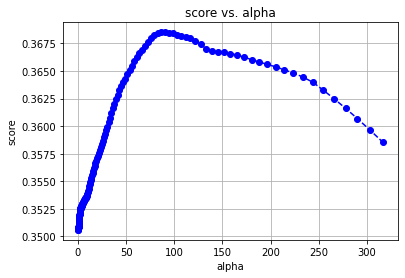

The optimaized alpha and score of Lasso linear is: 


(None, 90.1640802856486, 0.3685089888371096)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt 

lr_train, lr_validate = train_test_split(train, test_size = 0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis =1)
lr_validate_x = lr_validate.drop(['video_id','cvt_per_day'], axis=1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace(-0.3, 2.5, num=150)
#alphas = [0.00000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i]> max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color = 'b', linestyle= 'dashed', marker='o', markerfacecolor = 'blue', markersize = 6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
modell_para = opt_a
print('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score



In [ ]:
#combine the validate data and training data, use the optimal alpha, re-train the model 
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=90.1640802856486, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### **3.2 Ridge linear regression**

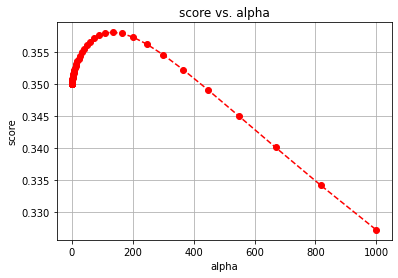

The optimaized alpha and score of Ridge linear is: 


(None, 134.12717530678955, 0.3581138051249837)

In [ ]:
#use the same training data set as Lasso (Linear features)

lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state =0)

alphas = np.logspace(-10, 3, num=150)
#alphas = [0.00000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a=a
        ridge_save = ridge

plt.plot(alphas, scores, color = 'r', linestyle= 'dashed', marker='o', markerfacecolor = 'r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model3_para = opt_a
print('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
#add the 15% validate data, use the optimal alpha, re-train the model

ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

# ridge_f is the Ridge model(linear feature), to be tested with test data

Ridge(alpha=134.12717530678955, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## ***3.3 Random Forest ***

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=2, max_features='sqrt', n_jobs=-1)
param_grid = {'n_estimators':[55,56,57,58,59,60,61,62,63,64,65], 'max_depth':[15,16,17,18,19,20,21]} 
clf = GridSearchCV(estimator=rf, param_grid= param_grid, cv=5, refit=True, n_jobs=1, pre_dispatch='2*n_jobs')
clf.fit(model_train_x, model_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=1,

{'mean_fit_time': array([0.50277205, 0.32764525, 0.33332911, 0.34641209, 0.35525756,
       0.31684771, 0.31955466, 0.32716293, 0.33632789, 0.3392549 ,
       0.34906387, 0.33001232, 0.33855801, 0.3550602 , 0.3518311 ,
       0.35824308, 0.32460814, 0.34211507, 0.34410329, 0.35192795,
       0.35804176, 0.36438489, 0.34681931, 0.35464392, 0.36013799,
       0.36342626, 0.37875762, 0.34481964, 0.34923654, 0.36248913,
       0.36915703, 0.37223716, 0.38214126, 0.35485816, 0.35970707,
       0.37295027, 0.37640171, 0.38790803, 0.35452476, 0.36764398,
       0.36654258, 0.37597494, 0.38384919, 0.3977643 , 0.36844454,
       0.37235703, 0.38520603, 0.38690333, 0.40158253, 0.36407619,
       0.37585344, 0.38193388, 0.39455547, 0.40078616, 0.4030333 ,
       0.37294011, 0.3805089 , 0.38785634, 0.3923182 , 0.39708581,
       0.37226577, 0.38166513, 0.38746462, 0.40060711, 0.40212002,
       0.41888905, 0.37695165, 0.39206424, 0.39833913, 0.41335258,
       0.41422057, 0.3806478 , 0.38575807, 0

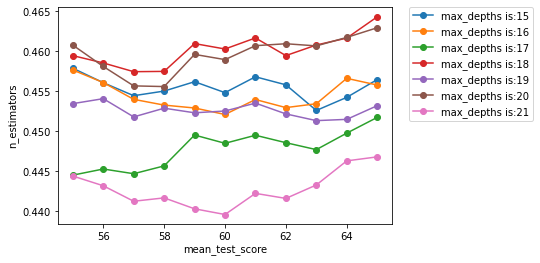

the best parameter for max_depth is: 18
the best parameter for n_estimators is :65


In [76]:
result= clf.cv_results_
print(result)
max_depth=[15,16,17,18,19,20,21]
n_estimators = [55,56,57,58,59,60,61,62,63,64,65]
scores = clf.cv_results_['mean_test_score'].reshape(len(max_depth), len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], '-o', label= 'max_depths is:'+str(j))
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', borderaxespad= 0.)
plt.xlabel('mean_test_score')
plt.ylabel('n_estimators')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is :' +str(clf.best_params_['n_estimators']))